Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


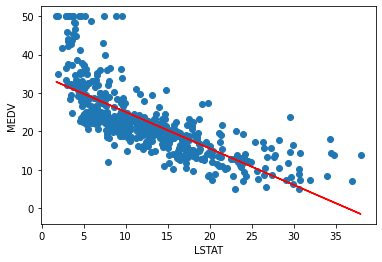

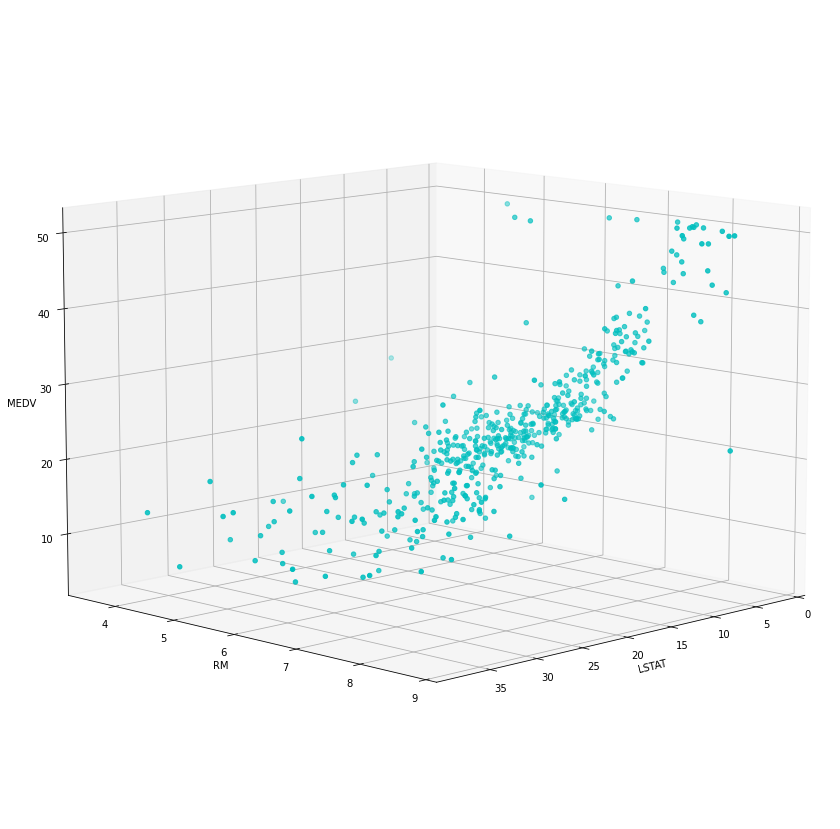

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['MEDV'] = dataset.target

df.head()  # 상위 5개 행만 리턴하는 함수인듯

#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)
#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])


plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
model = LinearRegression()
model.fit(X=df['LSTAT'].to_numpy().reshape(-1,1), y=df['MEDV'].to_numpy().reshape(-1,1))
plt.plot(df['LSTAT'], model.predict(df['LSTAT'].to_numpy().reshape(-1,1)), color='r')

plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'],
 df['RM'],
 df['MEDV'],
 c='c')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
ax.view_init(10, 45)
plt.show()

[37.1689804  29.32035435 25.58027087  1.15646598 33.20707082  8.44197544
 30.37221305 27.57463198 26.12976704 22.01624296 32.13551356 22.87944818
 22.66492916 30.77766892 26.87728603 20.52649771  0.07700859 17.73715803
 12.4852138  21.5337132   5.41730621 23.83920281 37.59483142 24.38880315
 29.45572317 12.97936433 26.66174451 22.28532221 27.15672582 28.55285561
 11.92050914 10.73457063 18.04609262 25.06581211 26.04950614 22.86501105
 26.1328205  12.78655949 37.06519613 33.01820965 20.30298129  1.93992794
 27.34958946 16.72165643 27.15469487 29.58123631 -2.17117984 17.36152288
 20.6656613  14.2815521  20.69641698 21.34126367 24.86153667 16.4242525
 17.55536557 27.42110603 35.81573065 19.9548413  28.51674903 20.32610396
 20.05492026 22.80452284 16.55464235 30.90531655 22.41792004 13.19072701
 23.32544191 25.48850806 22.6711396  21.3650088  19.39396145 26.0214486
 16.76791647 20.44659086 19.48139777 29.92580392 19.25450197 13.28096308
 28.36799435 19.04982456 21.99396576 38.66237215 16.0

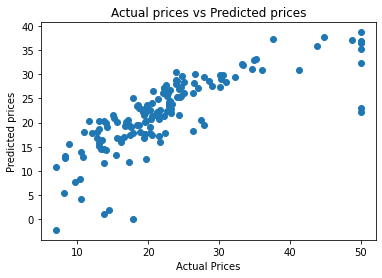

In [26]:
# 상관계수행렬 결과값에 따라 종속변수와 상관관계가 큰 LSTAT과 RM행렬을 가지고 선형회귀분석

# 머신러닝 지도학습용 데이터 준비

# np.c_ 속성 - 인덱스와 같은 대괄호 내에 넣어주는 객체들을 결합해줌
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

# 학습용으로 70%, 검증용으로 30% 비율로 데이터를 쪼갬
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

# 회귀모델 산출
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)
# 검증 - 검증용 데이터 사용
price_pred = model.predict(x_test)
print(price_pred)
# 검증 - 결정계수 값 확인
print('R-Squared: %.4f' % model.score(x_test, Y_test))

# 종속변수 실측값과 예측값을 산점도로 표현하여 결과가 맞는 정도를 시각화
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, price_pred)
print(mse)
plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()


<h2>다중회귀분석 실습</h2>
<br>
데이터 - 브라질 맥주 소비량 csv데이터<br>
온도, 강우량, 소비량(liters)<br>
* 소비량에 영향이 큰 2개의 요인을 추출, 각 요인과 소비량의 산점도를 통하여 선형성을 확인<br>
* 다중회귀분석, 검증<br>
* 실측치 vs 예측치 산점도에 표시, 추정<br>
* 각 요인(독립변수)에 대한 계수 및 절편 구하기

Index(['Consumo de cerveja (litros)', 'Temperatura Maxima (C)',
       'Temperatura Media (C)'],
      dtype='object')
[1.         0.64267247 0.5746147 ]


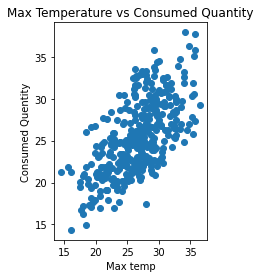

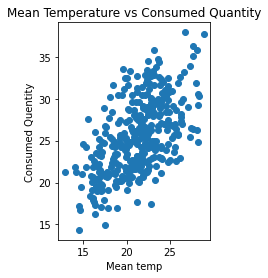

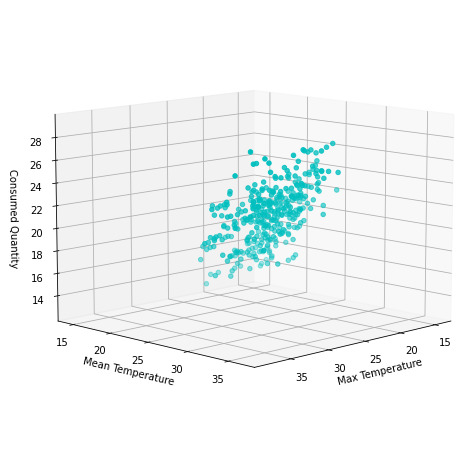

검증결과 5개: [30.3365252  26.68617332 28.30423896 28.02123555 21.44605528]
R-Squared: 0.3751
기울기 [ 0.74910783 -0.10645408]
절편 7.694279392416288


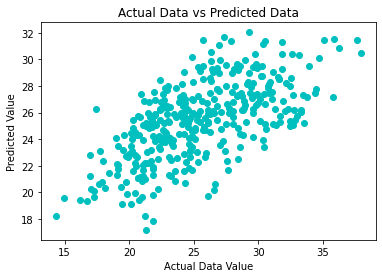

최고기온 38 , 평균기온 36 일 때 맥주 판매량 예상수치 : 32.328030016655745 (L)


In [146]:
df = pd.read_csv('Consumo_cerveja.csv')

# NaN값 제거
df = df.dropna()

# ,를 .으로 교체하고 숫자로 형변환
for i in range(len(df)):
    for j in range(len(df.columns)):
        if (isinstance(df.iloc[i,j], str)) and (df.iloc[i,j].find(',') != -1):
            df.iloc[i,j] = df.iloc[i,j].replace(',','.')
            df.iloc[i,j] = float(df.iloc[i,j])

# 데이터타입 확인
# print(df.info())
# print()
# object타입을 숫자형으로 변환 (날짜컬럼 제외)
for col in df.columns:
    if col != 'Data':
        df[col] = df[col].apply(pd.to_numeric)

# print(df.info())
# print()

# Consumo de cerveja (litros) 컬럼에 대한 각 컬럼의 상관계수 상위 3개 값 확인
topcols = df.corr().abs().nlargest(3, 'Consumo de cerveja (litros)')
print(topcols.index)
print(topcols.values[:,5])

# 'Temperatura Maxima (C)', 'Temperatura Media (C)' 두 컬럼이 
# 각각 0.64267247, 0.5746147로 가장 상관계수 절대값이 큰 두 컬럼

# 훈련용 데이터
x = pd.DataFrame(np.c_[df['Temperatura Maxima (C)'], df['Temperatura Media (C)']], 
                 columns = ['Temperatura Maxima (C)','Temperatura Media (C)'])
Y = df['Consumo de cerveja (litros)']

# 두 컬럼과 종속변수 컬럼간의 산점도
# 1. 최고기온 vs 맥주판매량

plt.subplot(121)  # 1행 2열 1번차트
plt.scatter(x.iloc[:,0], Y)
plt.xlabel("Max temp")
plt.ylabel("Consumed Quentity")
plt.title("Max Temperature vs Consumed Quantity")
plt.show()

# 1. 평균기온 vs 맥주판매량
plt.subplot(122)  # 1행 2열 2번차트
plt.scatter(x.iloc[:,1], Y)
plt.xlabel("Mean temp")
plt.ylabel("Consumed Quentity")
plt.title("Mean Temperature vs Consumed Quantity")
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y, x.iloc[:,0], x.iloc[:,1], c='c')

ax.set_xlabel("Max Temperature")
ax.set_ylabel("Mean Temperature")
ax.set_zlabel("Consumed Quantity")
ax.view_init(10, 45)
plt.show()

# 학습용으로 70%, 검증용으로 30% 비율로 데이터를 쪼갬
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

# 회귀모델 산출
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)
# 검증 - 검증용 데이터 사용
consume_pred = model.predict(x_test)
print('검증결과 5개:',consume_pred[0:5])
# 검증 - 결정계수 값 확인
print('R-Squared: %.4f' % model.score(x_test, Y_test))

# 기울기, 절편
print('기울기', model.coef_)
print('절편', model.intercept_)


# 실측치와 예측값 비교 산점도 표시
plt.scatter(Y, model.predict(x), color='c')
plt.xlabel("Actual Data Value")
plt.ylabel("Predicted Value")
plt.title("Actual Data vs Predicted Data")
plt.show()

# 추정
predx = [[38,36]]
print('최고기온',predx[0][0], ', 평균기온',predx[0][1],'일 때 맥주 판매량 예상수치 :',model.predict(predx)[0],'(L)')

회귀모델 : 7.694 + (0.749* x) + (-0.106 * y)


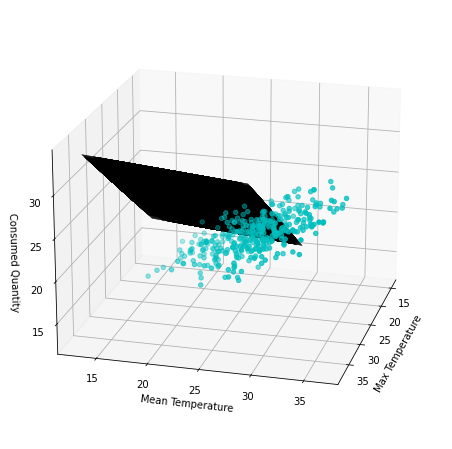

In [148]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures

x_surf = x.iloc[:,0] #  Temperatura Maxima (C)
y_surf = x.iloc[:,1] #  Temperatura Media (C)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y, x.iloc[:,0], x.iloc[:,1], c='c')

ax.set_xlabel("Max Temperature")
ax.set_ylabel("Mean Temperature")
ax.set_zlabel("Consumed Quantity")
ax.view_init(20, 15)
print('회귀모델 :',round(model.intercept_,3),'+ ('+str(round(model.coef_[0],3))+'* x) + (' + str(round(model.coef_[1],3)) + ' * y)')
z = lambda x,y: (model.intercept_ + (model.coef_[0] * x) + (model.coef_[1] * y))
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
 rstride=1,
 cstride=1,
 color='None',
 alpha = 0.4)
plt.show()



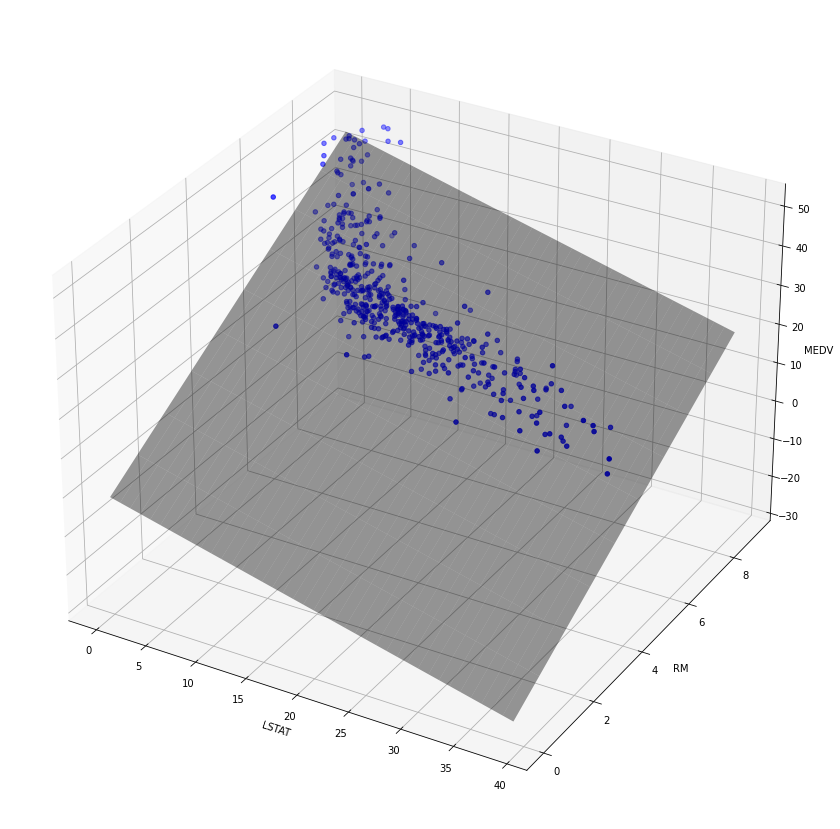

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'],
 x['RM'],
 Y,
 c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1) #---for LSTAT---
y_surf = np.arange(0, 10, 1) #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)
#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
 rstride=1,
 cstride=1,
 color='None',
 alpha = 0.4)
plt.show()